# Prelude

In [2]:
import pandas
import numpy
import matplotlib
import math
import seaborn

from matplotlib.ticker import FuncFormatter

from matplotlib import pyplot
seaborn.set()

In [3]:
pyplot.rcParams['figure.figsize'] = (8, 3)

# Methodology

## IoU Loss

In [4]:
pyplot.rcParams['figure.figsize'] = (8, 2)

In [5]:
baseline_unet_iou_scores = numpy.array([0.80655, 0.94167, 1.1333, 1.23879, 1.19409, 1.29541, 1.43649, 1.45572, 1.40763, 1.54757, 1.54512, 1.62514, 1.58909, 1.63719, 1.63433, 1.64935, 1.58962, 1.62392, 1.62088, 1.67552, 1.71471, 1.72858, 1.73372, 1.72914, 1.73151 ])
iou_scores = numpy.array([0.580644, 0.825078, 1.002738, 1.062624, 1.094208, 1.16223 , 1.172382, 1.19916 , 1.207314, 1.211604, 1.228476, 1.237602, 1.24782 , 1.2693  , 1.246296, 1.270392, 1.284264, 1.276806, 1.24887 , 1.287498, 1.276524, 1.273062, 1.278174, 1.289184, 1.27605 , 1.297236, 1.28967 , 1.307922, 1.286892, 1.306152, 1.304334, 1.31247 , 1.313568, 1.308894, 1.2882  , 1.314426, 1.301484, 1.310898, 1.322148, 1.326732, 1.303938, 1.30047 , 1.30146 , 1.318464, 1.31979 , 1.31559 , 1.315164, 1.347408, 1.365168, 1.358502, 1.37403 , 1.367736, 1.382046, 1.381686, 1.384878, 1.389654, 1.380972, 1.374234, 1.379508, 1.37712 , 1.379538, 1.368276, 1.373028, 1.386138, 1.37145 , 1.384296, 1.374822, 1.382736, 1.3857  , 1.387524, 1.377534, 1.376508, 1.375404, 1.375512, 1.380612, 1.38114 , 1.37805 , 1.375566, 1.370598, 1.380654, 1.374876, 1.378656, 1.370988, 1.371438, 1.373898, 1.376526, 1.377024, 1.383936, 1.376634, 1.36722 , 1.377798, 1.373286, 1.370508, 1.373052, 1.370142, 1.376814, 1.371828, 1.365318, 1.374996, 1.37223 ])

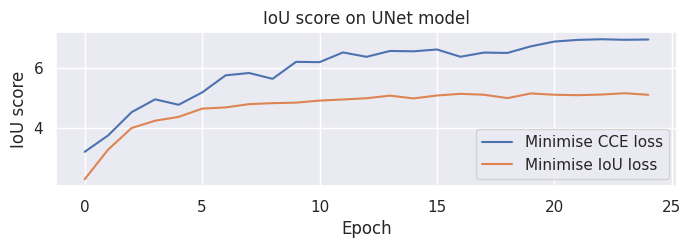

In [6]:
pyplot.title('IoU score on UNet model')
pyplot.xlabel('Epoch')
pyplot.ylabel('IoU score')

unet_mult = 4

pyplot.plot(unet_mult * baseline_unet_iou_scores, label = 'Minimise CCE loss')
pyplot.plot(unet_mult * iou_scores[:25], label = 'Minimise IoU loss')
pyplot.legend()

# pyplot.xticks(ticks=numpy.arange(len(baseline_unet_iou_scores)), labels=numpy.arange(1, len(baseline_unet_iou_scores) + 1))

pyplot.savefig('../cce_vs_iou_loss.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

# Gammas

In [12]:
pyplot.rcParams['figure.figsize'] = (8, 3)

In [13]:
gamma   = pandas.read_csv('gamma_losses.csv', index_col = 0)
nogamma = pandas.read_csv('nogamma_losses.csv', index_col = 0).loc[:gamma.shape[0]]
colors = seaborn.color_palette(None, 2)

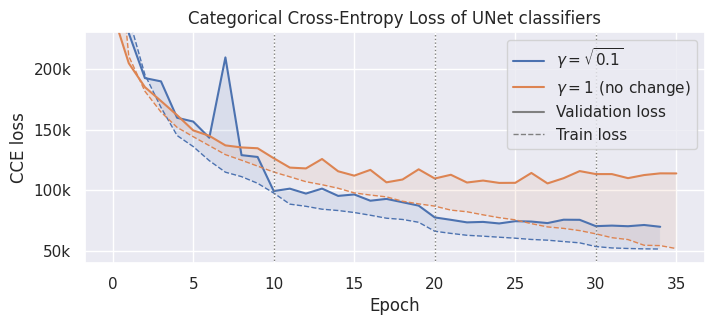

In [14]:
pyplot.ylim((40000, 230000))

pyplot.plot(gamma['train'], color = colors[0], linestyle = '--', linewidth = 1)
pyplot.plot(gamma['val'], color = colors[0])

pyplot.fill_between(gamma.index, gamma['train'], gamma['val'], alpha = .1)

pyplot.plot(nogamma['train'], color = colors[1], linestyle = '--', linewidth = 1)
pyplot.plot(nogamma['val'], color = colors[1])

pyplot.fill_between(nogamma.index, nogamma['train'], nogamma['val'], alpha = .1)

pyplot.plot([], color = colors[0], label = '$\\gamma = \\sqrt{0.1}$')
pyplot.plot([], color = colors[1], label = '$\\gamma = 1$ (no change)')

pyplot.plot([], color = 'gray',  label = 'Validation loss')
pyplot.plot([], color = 'gray', linestyle = '--', linewidth = 1, label = 'Train loss')

pyplot.xlabel('Epoch')
pyplot.ylabel('CCE loss')

pyplot.vlines([10, 20, 30], 0, 1000000, color = 'gray', linestyle = 'dotted', linewidth = 1)

a = pyplot.gca().yaxis.set_major_formatter(lambda a, b: f'{int(a // 1000)}k')

pyplot.legend()

pyplot.title('Categorical Cross-Entropy Loss of UNet classifiers')

pyplot.savefig('../gamma_vs_nogamma.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

# Param Sweep

In [135]:
pyplot.rcParams['figure.figsize'] = (5, 7)

## UNet

In [136]:
unet = pandas.read_csv('UNet_sweep_results.csv')
unet['n'] = unet.sweep.apply(lambda x: 2975 // sum(unet.sweep == x))

In [137]:
print(unet.sweep.value_counts())
unet.head()

sweep
0    12
1     6
2     3
Name: count, dtype: int64


,sweep,lr,gamma,weight_decay,val_loss,n
0,0,0.001,1.000000,0.0000,294165.250000,247
1,0,0.001,1.000000,0.0001,208904.296875,247
2,0,0.001,0.316228,0.0000,242266.578125,247
3,0,0.001,0.316228,0.0001,242775.468750,247
4,0,0.001,0.100000,0.0000,249564.703125,247


In [138]:
pandas.concat(
    [
        unet,
        unet.apply(lambda x: sum((x.sweep == unet.sweep) & (x.val_loss > unet.val_loss)), axis = 1).rename('Left'),
        unet.apply(lambda x: sum(x.sweep == unet.sweep) // 2, axis = 1).rename('Right'),
        unet.apply(lambda x: 1 if sum((x.sweep == unet.sweep) & (x.val_loss > unet.val_loss)) < sum(x.sweep == unet.sweep) // 2 else .4, axis = 1).rename('Result'),
    ],
    axis = 1,
).sort_values(['sweep', 'val_loss'])

,sweep,lr,gamma,weight_decay,val_loss,n,Left,Right,Result
1,0,0.0010,1.000000,0.0001,208904.296875,247,0,6,1.0
2,0,0.0010,0.316228,0.0000,242266.578125,247,1,6,1.0
3,0,0.0010,0.316228,0.0001,242775.468750,247,2,6,1.0
5,0,0.0010,0.100000,0.0001,242822.484375,247,3,6,1.0
4,0,0.0010,0.100000,0.0000,249564.703125,247,4,6,1.0
6,0,0.0001,1.000000,0.0000,262162.125000,247,5,6,1.0
7,0,0.0001,1.000000,0.0001,264604.781250,247,6,6,0.4
0,0,0.0010,1.000000,0.0000,294165.250000,247,7,6,0.4
8,0,0.0001,0.316228,0.0000,314429.937500,247,8,6,0.4
9,0,0.0001,0.316228,0.0001,318079.281250,247,9,6,0.4


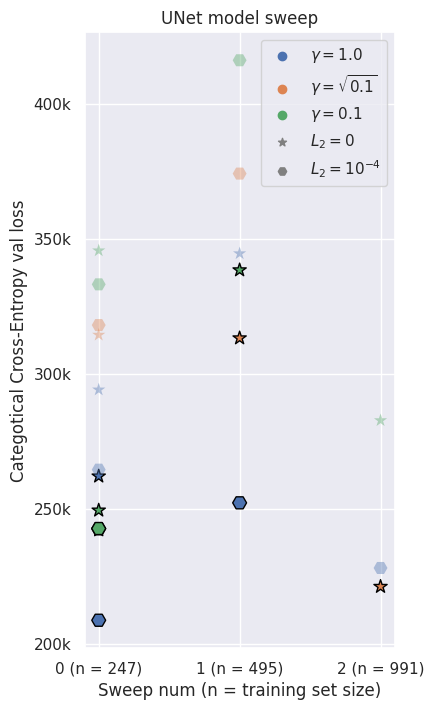

In [192]:
pyplot.rcParams['figure.figsize'] = (4, 8)

palette = seaborn.color_palette(None, 3)
colors = {
    unet.gamma[0]: palette[0],
    unet.gamma[2]: palette[1],
    unet.gamma[4]: palette[2],
}

# markers = {
#     unet.lr[0]: '*',
#     unet.lr[6]: 'H',
# }

markers = {
    unet.weight_decay[0]: '*',
    unet.weight_decay[1]: 'H',
}

pyplot.xticks([0, 1, 2])
pyplot.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x} (n = {2975 // sum(unet.sweep == x)})'))
pyplot.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x // 1000)}k'))
# pyplot.gca().invert_yaxis()
for k, marker in markers.items():
    subunet = unet[unet.weight_decay == k]

    # for k, linewidth in widths.items():
        # subunet = superunet[superunet.weight_decay == k]
    pyplot.scatter(
        subunet.sweep,
        subunet.val_loss,
        color = [colors[x] for x in subunet.gamma],
        edgecolor = 'black',
        s = 100,
        marker = marker,
        # linewidths = linewidth,
        linewidths = subunet.apply(lambda x: 1 if sum((x.sweep == unet.sweep) & (x.val_loss > unet.val_loss)) < sum(x.sweep == unet.sweep) // 2 else 0, axis = 1),
        alpha = subunet.apply(lambda x: 1 if sum((x.sweep == unet.sweep) & (x.val_loss > unet.val_loss)) < sum(x.sweep == unet.sweep) // 2 else .4, axis = 1),
    )

pyplot.scatter([], [], color = palette[0], label = f'$\gamma = {unet.gamma[0]}$')
pyplot.scatter([], [], color = palette[1], label = '$\gamma = \sqrt{0.1}$')
pyplot.scatter([], [], color = palette[2], label = f'$\gamma = {unet.gamma[4]}$')

pyplot.scatter([], [], color = 'grey', marker = '*', label = '$L_2 = 0$')
pyplot.scatter([], [], color = 'grey', marker = 'H', label = '$L_2 = 10^{-4}$')

# pyplot.scatter([], [], color = 'white', linewidth = 0, label = 'WD = 0')
# pyplot.scatter([], [], color = 'white', linewidth = 1, edgecolor = 'black', label = 'WD = $10^{-4}$')

pyplot.title('UNet model sweep')
pyplot.ylabel('Categotical Cross-Entropy val loss')
pyplot.xlabel('Sweep num (n = training set size)')

pyplot.legend()

pyplot.savefig('../unet_sweep.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

## Swin2

In [183]:
swin2 = pandas.read_csv('Swin2_sweep_results.csv')
swin2['n'] = swin2.sweep.apply(lambda x: 2975 // sum(swin2.sweep == x))

In [184]:
swin2.head(20)

,sweep,lr,gamma,weight_decay,dropout,val_loss,n
0,0,0.0010,1.000000,0.0000,0.00,69467.062500,82
1,0,0.0010,1.000000,0.0000,0.05,54532.648438,82
2,0,0.0010,1.000000,0.0000,0.10,74958.382812,82
3,0,0.0010,1.000000,0.0001,0.00,61599.546875,82
4,0,0.0010,1.000000,0.0001,0.05,57710.722656,82
5,0,0.0010,1.000000,0.0001,0.10,68413.671875,82
6,0,0.0010,0.316228,0.0000,0.00,81973.562500,82
7,0,0.0010,0.316228,0.0000,0.05,76917.125000,82
8,0,0.0010,0.316228,0.0000,0.10,81440.539062,82
9,0,0.0010,0.316228,0.0001,0.00,83225.109375,82


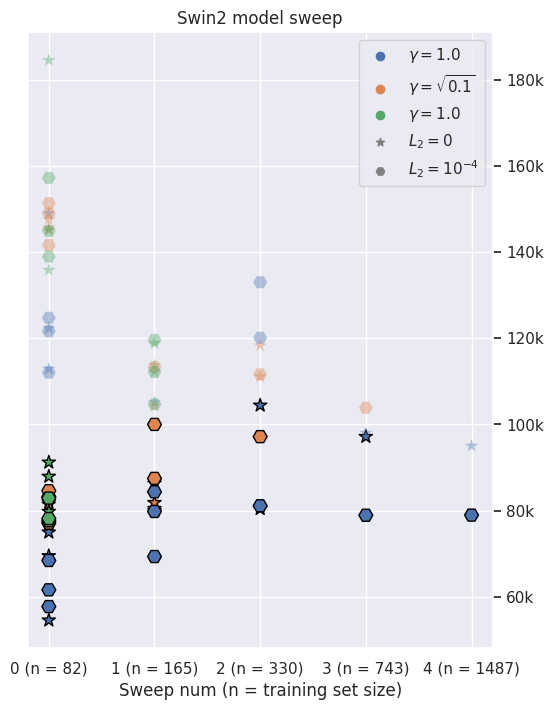

In [190]:
pyplot.rcParams['figure.figsize'] = (6, 8)

palette = seaborn.color_palette(None, 3)
colors = {
    swin2.gamma[0]: palette[0],
    swin2.gamma[6]: palette[1],
    swin2.gamma[12]: palette[2],
}

# markers = {
#     swin2.lr[0]: '*',
#     swin2.lr[6]: 'H',
# }

markers = {
    swin2.weight_decay[0]: '*',
    swin2.weight_decay[3]: 'H',
}

pyplot.xticks([0, 1, 2, 3, 4])
pyplot.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x} (n = {2975 // sum(swin2.sweep == x)})'))
pyplot.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x // 1000)}k'))
pyplot.gca().yaxis.tick_right()
# pyplot.gca().invert_yaxis()
for k, marker in markers.items():
    subswin2 = swin2[swin2.weight_decay == k]

    # for k, linewidth in widths.items():
        # subswin2 = superswin2[superswin2.weight_decay == k]
    pyplot.scatter(
        subswin2.sweep,
        subswin2.val_loss,
        color = [colors[x] for x in subswin2.gamma],
        edgecolor = 'black',
        s = 100,
        marker = marker,
        # linewidths = linewidth,
        linewidths = subswin2.apply(lambda x: 1 if sum((x.sweep == swin2.sweep) & (x.val_loss > swin2.val_loss)) < sum(x.sweep == swin2.sweep) // 2 else 0, axis = 1),
        alpha = subswin2.apply(lambda x: 1 if sum((x.sweep == swin2.sweep) & (x.val_loss > swin2.val_loss)) < sum(x.sweep == swin2.sweep) // 2 else .4, axis = 1),
    )

pyplot.scatter([], [], color = palette[0], label = f'$\gamma = {swin2.gamma[0]}$')
pyplot.scatter([], [], color = palette[1], label = '$\gamma = \sqrt{0.1}$')
pyplot.scatter([], [], color = palette[2], label = f'$\gamma = {swin2.gamma[4]}$')

pyplot.scatter([], [], color = 'grey', marker = '*', label = '$L_2 = 0$')
pyplot.scatter([], [], color = 'grey', marker = 'H', label = '$L_2 = 10^{-4}$')

# pyplot.scatter([], [], color = 'white', linewidth = 0, label = 'WD = 0')
# pyplot.scatter([], [], color = 'white', linewidth = 1, edgecolor = 'black', label = 'WD = $10^{-4}$')

pyplot.title('Swin2 model sweep')
# pyplot.ylabel('Categotical Cross-Entropy val loss')
pyplot.xlabel('Sweep num (n = training set size)')

pyplot.legend()

pyplot.savefig('../swin2_sweep.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

# Result Plots

In [137]:
pyplot.rcParams['figure.figsize'] = (8, 1.5)

In [138]:
swin2 = pandas.read_csv('swin2_data.csv', index_col = 0)

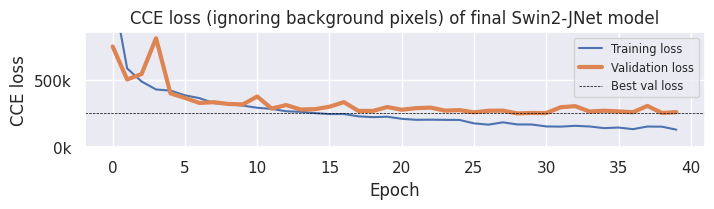

In [167]:
pyplot.ylim((0, 0.86e6))

pyplot.plot(swin2['train_loss'], label = 'Training loss')
pyplot.plot(swin2['val_loss'], label = 'Validation loss', linewidth = 3)

pyplot.axhline(swin2.val_loss.min(), linestyle = '--', linewidth = .5, color = 'black', label = 'Best val loss')

pyplot.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x // 1000)}k'))

pyplot.title('CCE loss (ignoring background pixels) of final Swin2-JNet model')
pyplot.xlabel('Epoch')
pyplot.ylabel('CCE loss')

pyplot.legend(loc = 0, fontsize = 'x-small')

pyplot.savefig('../swin2_loss.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

In [160]:
unet = pandas.read_csv('unet_data.csv', index_col = 0).loc[:40]

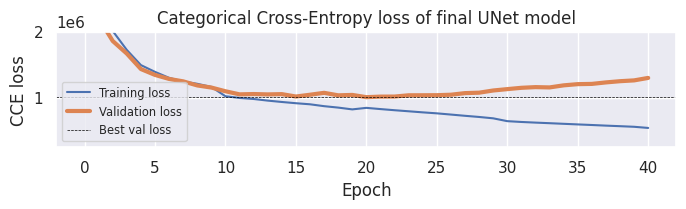

In [168]:
pyplot.ylim((0.25e6, 2e6))

pyplot.plot(unet['train_loss'], label = 'Training loss')
pyplot.plot(unet['val_loss'], label = 'Validation loss', linewidth = 3)

pyplot.axhline(unet.val_loss.min(), linestyle = '--', linewidth = .5, color = 'black', label = 'Best val loss')

pyplot.title('Categorical Cross-Entropy loss of final UNet model')
pyplot.xlabel('Epoch')
pyplot.ylabel('CCE loss')

pyplot.legend(loc = 0, fontsize = 'x-small')

pyplot.savefig('../unet_loss.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

In [165]:
baseline = pandas.read_csv('baseline_data.csv', index_col = 0).loc[:40]

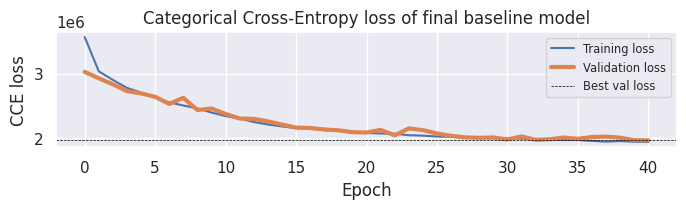

In [169]:
# pyplot.ylim((0.25e6, 2e6))

pyplot.plot(baseline['train_loss'], label = 'Training loss')
pyplot.plot(baseline['val_loss'], label = 'Validation loss', linewidth = 3)

pyplot.axhline(baseline.val_loss.min(), linestyle = '--', linewidth = .5, color = 'black', label = 'Best val loss')

pyplot.title('Categorical Cross-Entropy loss of final baseline model')
pyplot.xlabel('Epoch')
pyplot.ylabel('CCE loss')

pyplot.legend(loc = 0, fontsize = 'x-small')

pyplot.savefig('../baseline_loss.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

# IoU scores

In [34]:
from matplotlib.patches import Rectangle

In [118]:
pyplot.rcParams['figure.figsize'] = (8, 2)

In [119]:
# We mistakenly divided IoU scores by batch size when calculating them.
baseline_mult = 6
unet_mult = 4
swin2_no_background_mult = 4

In [120]:
baseline = baseline_mult * pandas.read_csv('baseline_iou.csv', index_col = 0)
unet = unet_mult * pandas.read_csv('unet_iou.csv', index_col = 0)
swin2 = swin2_no_background_mult * pandas.read_csv('swin2_no_background_iou.csv', index_col = 0)

In [121]:
swin2.loc[30]

iou     28.196243
iiou    29.930153
Name: 30, dtype: float64

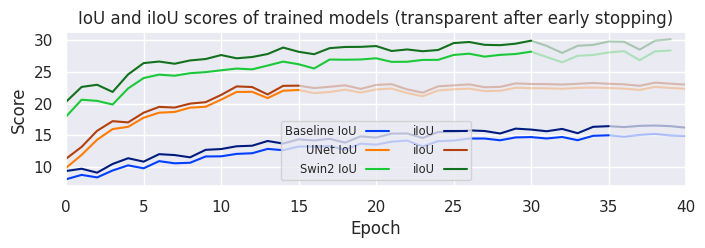

In [133]:
light = seaborn.color_palette('bright', 3)
dark = seaborn.color_palette('dark', 3)

pyplot.plot(baseline.iou[:36], color = light[0], label = 'Baseline IoU')
pyplot.plot(baseline.iou[35:], color = light[0], alpha = .3)

pyplot.plot(unet.iou[:16], color = light[1], label = 'UNet IoU')
pyplot.plot(unet.iou[15:], color = light[1], alpha = .3)

pyplot.plot(swin2.iou[:31], color = light[2], label = 'Swin2 IoU')
pyplot.plot(swin2.iou[30:], color = light[2], alpha = .3)

pyplot.plot(baseline.iiou[:36], color = dark[0], label = 'iIoU')
pyplot.plot(baseline.iiou[35:], color = dark[0], alpha = .3)

pyplot.plot(unet.iiou[:16], color = dark[1], label = 'iIoU')
pyplot.plot(unet.iiou[15:], color = dark[1], alpha = .3)

pyplot.plot(swin2.iiou[:31], color = dark[2], label = 'iIoU')
pyplot.plot(swin2.iiou[30:], color = dark[2], alpha = .3)

pyplot.xlabel('Epoch')
pyplot.ylabel('Score')

pyplot.title('IoU and iIoU scores of trained models (transparent after early stopping)')

# pyplot.legend(ncols = 3, markerfirst = True, fontsize = 'x-small', bbox_to_anchor = (.69, -.31), columnspacing = 3)
pyplot.legend(loc = 0, fontsize = 'x-small', ncols = 2, markerfirst = False)

pyplot.xlim(0, 40)

pyplot.savefig('../iou_scores.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)